In [1]:
import os, sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

In [2]:
def open_my_img(img_name, img_type = ".jpg", folder_name = "demo-data"):
    abs_path = os.path.dirname(os.path.realpath('__file__'))
    img_path = "{}\{}\{}".format(abs_path, folder_name, img_name + img_type)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return (image, img_path)

In [3]:
my_image, image_path = open_my_img("St-Pauls-Cathedral")

In [4]:
def show_original_using_plt(path):
    original = mpimg.imread(path)
    plt.imshow(original)

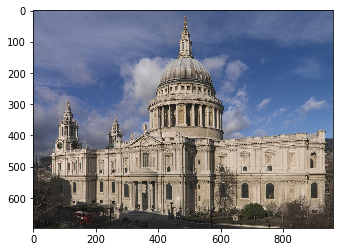

In [5]:
show_original_using_plt(image_path)

In [6]:
orb = cv2.ORB_create()
keypoints = orb.detect(my_image, None)

In [7]:
#keypoints

In [8]:
kp = keypoints[1]

In [9]:
print("{}\n{}\n{}\n{}\n{}\n{}\n".format(\
                                        kp.angle, kp.pt, kp.size,\
                                        kp.class_id, kp.octave, kp.class_id))

299.81573486328125
(601.0, 381.0)
31.0
-1
0
-1



In [10]:
my_point = cv2.KeyPoint()

In [11]:
my_point.pt

(0.0, 0.0)

In [12]:
class MyKeyPoint(cv2.KeyPoint):
    def __init__(self, _x, _y, _angle, _size, _octave):
        self.x = _x
        self.y = _y
        self.ang = _angle
        self.sz = _size
        self.oct = _octave
    def print_self():
        print("X:{} Y:{} октава:{}".format(self.x, self.y, self.sz))

In [13]:
my_kp = MyKeyPoint(12, 144, 299.81573486328125, 31.0, 0)

In [14]:
my_kp.x

12

In [15]:
type(kp.pt[1])

float

In [16]:
print(kp.pt)

(601.0, 381.0)


In [17]:
def get_descriptor(img, algorithm):
    if algorithm == "SIFT":
        sift = cv2.xfeatures2d.SURF_create()
        return sift.detectAndCompute(img, None)
    
    if algorithm == "ORB":
        orb = cv2.ORB_create()
        return orb.detectAndCompute(img, None)
    
    if algorithm == "AKAZE":
        akaze = cv2.AKAZE_create()
        return akaze.detectAndCompute(img, None)

In [20]:
def kaze_match(im1_path, im2_path):
    # load the image and convert it to grayscale
    im1 = cv2.imread(im1_path)
    im2 = cv2.imread(im2_path)
    gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)    

    # initialize the AKAZE descriptor, then detect keypoints and extract
    # local invariant descriptors from the image
    detector = cv2.AKAZE_create()
    (kps1, descs1) = detector.detectAndCompute(gray1, None)
    (kps2, descs2) = detector.detectAndCompute(gray2, None)

    print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
    print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

    # Match the features
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descs1,descs2, k=2)    # typo fixed

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)
    cv2.imshow("AKAZE matching", im3)
    cv2.waitKey(0) 

In [21]:
_obj01, _path01 = open_my_img("face_02")
_obj02, _path02 = open_my_img("face_03")

In [22]:
_, keypoints_orb_face01 = get_descriptor(_obj01, "ORB")
_, keypoints_orb_face02 = get_descriptor(_obj02, "ORB")

_, keypoints_sift_face01 = get_descriptor(_obj01, "SIFT")
_, keypoints_sift_face02 = get_descriptor(_obj02, "SIFT")

_, keypoints_akaze_face01 = get_descriptor(_obj01, "AKAZE")
_, keypoints_akaze_face02 = get_descriptor(_obj02, "AKAZE")

In [23]:
def abstract_match(im1_name, im2_name, algorithm = "AKAZE"):
    # load the image and convert it to grayscale
    (im1, _) = open_my_img(im1_name)
    (im2, _) = open_my_img(im2_name)   

    # initialize the descriptor, then detect keypoints and extract
    # local invariant descriptors from the image
    (kps1, descs1) = get_descriptor(im1, algorithm)
    (kps2, descs2) = get_descriptor(im2, algorithm)

    print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
    print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

    # Match the features
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descs1, descs2, k=2) # typo fixed

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)
    cv2.imshow("AKAZE matching", im3)
    cv2.waitKey(0)

In [ ]:
#abstract_match("face_02", "face_03", "ORB")
abstract_match("face_02", "face_03")

keypoints: 576, descriptors: (576, 61)
keypoints: 70, descriptors: (70, 61)
